In [1]:
import tensorflow as tf
import wandb
from wandb.integration.keras import WandbCallback

2024-07-31 11:15:52.620641: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 11:15:52.622293: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 11:15:52.646159: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 11:15:52.646191: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 11:15:52.646215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### Hyperparameters

Wandb (Weights & Biases) is a machine learning platform that helps developers track experiments, visualize data, and share insights to improve models efficiently. (https://wandb.ai)

In [2]:
USE_WANDB = False
EPOCHS = 15

### Dataload

In [3]:
# Load CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train/255, x_test/255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Creation of Model, Training and Evaluation

In [4]:
if USE_WANDB:
    wandb.init(project="federated_learning",
               group="group_1", name=f"tf_centralized_{EPOCHS}epochs")

# Create the model
def create_keras_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(
            20, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(50, (5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


# Compile the model
model = create_keras_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Train the model.
callbacks = [WandbCallback(mode="auto",log_weights=True, training_data=(
    x_train, y_train), validation_data=(x_test, y_test), input_type="images")] if USE_WANDB else []

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(
    x_test, y_test), callbacks=callbacks, batch_size=40)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

if USE_WANDB:
    wandb.finish()

Epoch 1/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4686 - categorical_accuracy: 0.4700 - val_loss: 1.3033 - val_categorical_accuracy: 0.5423
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1247 - categorical_accuracy: 0.6025 - val_loss: 1.0585 - val_categorical_accuracy: 0.6293
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9633 - categorical_accuracy: 0.6630 - val_loss: 0.9825 - val_categorical_accuracy: 0.6541
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8374 - categorical_accuracy: 0.7073 - val_loss: 0.9299 - val_categorical_accuracy: 0.6782
Epoch 5/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7306 - categorical_accuracy: 0.7433 - val_loss: 0.9624 - val_categorical_accuracy: 0.6713
Epoch 6/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6261 - categorical_accuracy: 0.7839 - val_loss: 0.9566 - val_categorical_accuracy:

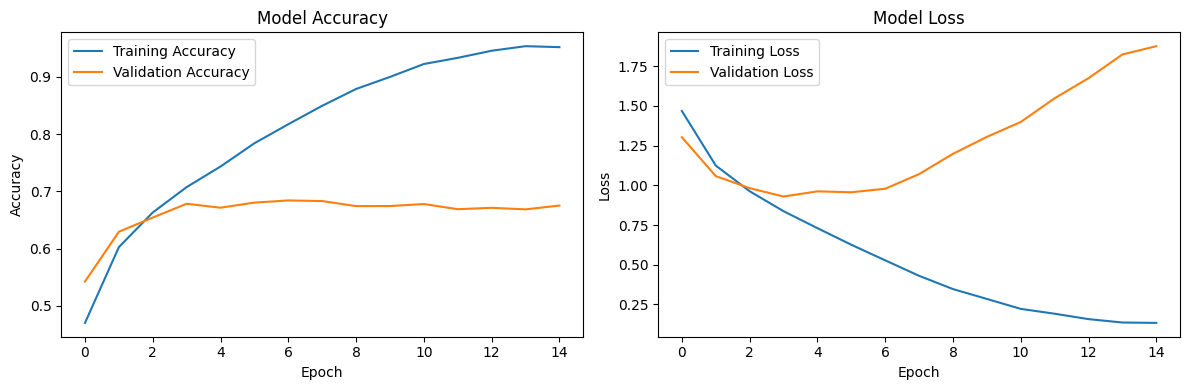

In [5]:

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'],
         label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()